In [1]:
from bs4 import BeautifulSoup

In [2]:
import requests
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy

Now, we create a request and get the data from the website.

In [3]:
#we are using request package to make a GET request for the website, which means we're getting data from it.
r = requests.get("https://www.newsy.com/stories/commercial-companies-advance-space-exploration/")

In [4]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [5]:
#Extracting the HTML from the request object
html = r.text

In [6]:
# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics: GA4 --><script>var gtCode = 'G-D7R21VYTPB'; // live
                    var gtScriptElement = document.createElement('script')
                    gtScriptElement.src = `https://www.googletagmanager.com/gtag/js?id=${gtCode}&l=GA4DataLayer`;
                    gtScriptElement.onload = OnceLoaded;
                    document.getElementsByTagName('head')[0].appendChild(gtScriptElement);
                    function OnceLoaded() {
       


In [7]:
# Creating a BeautifulSoup object from the HTML

soup = BeautifulSoup(html)

#getting the text out of soup
text = soup.get_text()

In [8]:
#total length of text
len(text)

4853

In [9]:
print(text[100:1100])

ePoliticsBusinessScience/HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us






SpaceHow Commercial Companies Are Advancing Space ExplorationThere's competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to di

In [10]:
clean_text = text.replace("\n", " ").replace("\'", " ")

In [11]:
clean_text

'Commercial Companies Advance Space Exploration     Scripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience/HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us       SpaceHow Commercial Companies Are Advancing Space ExplorationThere s competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy\xa0Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the  Starship  lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next mon

In [13]:
#loads a specific pre-trained NLP model from SpaCy
nlp = spacy.load('en_core_web_sm')

In [14]:
#now let's split the text into individual sentences

sentences = []
tokens = nlp(clean_text)
for sent in tokens.sents:
  sentences.append((sent.text.strip()))


In [17]:
sentences

['Commercial Companies Advance Space Exploration     Scripps Newswatch livetoggle menuNewsU.S. NewsLifePoliticsBusinessScience/HealthWorldTechEntertainmentSportsShowsScheduleShow ListDocumentariesIn Real LifeNext LevelBellingcatAll DocsInvestigationsAboutTeamViewer SpotlightHotlineSupportWhere to WatchSearchFollow Us       SpaceHow Commercial Companies Are Advancing Space ExplorationThere s competition among roughly a dozen private companies to launch new space stations.',
 'How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy\xa0Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT',
 'Oct 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.',
 'Newly released video shows the  Starship  lifting into an aerial ballet of flips and turns before landing again.',
 'SpaceX hopes the ship will reach orbit for the 

In [18]:
len(sentences)

34

In [20]:
sentences[3]

'Newly released video shows the  Starship  lifting into an aerial ballet of flips and turns before landing again.'

Now, that we have the data as sentences, let us proceed with sentiment analysis.

### Sentiment Analysis with Textblob

Textblob is a Python library for text processing and NLP. Textblob has built-in functions for performing sentiment analysis. The function returns a score for polarity and subjectivity.

Polarity score can be positive or negative, and Subjectivity varies between 0 and 1.

**TextBlob:**

TextBlob is a high-level NLP library in Python that simplifies many common NLP tasks.

It provides an easy-to-use and Pythonic interface for tasks like tokenization, part-of-speech tagging, noun phrase extraction, sentiment analysis, translation, and more.

TextBlob is known for its simplicity and ease of use, making it a good choice for beginners or for quickly prototyping NLP applications.



In [ ]:
from textblob import TextBlob
!pip install pattern
from pattern.en import sentiment

In [23]:
#let's create an empty list and get all the data

textblob_sentiment = []

for s in sentences:
  txt = TextBlob(s)
  a = txt.sentiment.polarity
  b = txt.sentiment.subjectivity
  textblob_sentiment.append([s,a,b])

In [ ]:
textblob_sentiment

In [26]:
#now let's convert this list into the dataframe

df_textblob = pd.DataFrame(textblob_sentiment, columns = ['Sentence', 'Polarity', 'Subjectivity'])

In [27]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.039394,0.254924
1,How Commercial Companies Are Advancing Space E...,0.000000,0.000000
2,"Oct 29, 2021As astronauts blast off to the Int...",0.050000,0.750000
3,Newly released video shows the Starship lift...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


In [28]:
df_textblob.shape


(34, 3)

In [29]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      34 non-null     object 
 1   Polarity      34 non-null     float64
 2   Subjectivity  34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [40]:
#let's first analyse the sentence polarity using plotly
import plotly.express as px

fig = px.histogram(df_textblob, x="Polarity", nbins=30, height=500, width=900)
fig.update_layout(xaxis_title="Sentence Polarity (Textblob)")
fig.show()


Text(0.5, 9.444444444444438, 'Sentence Polarity (Textblob)')

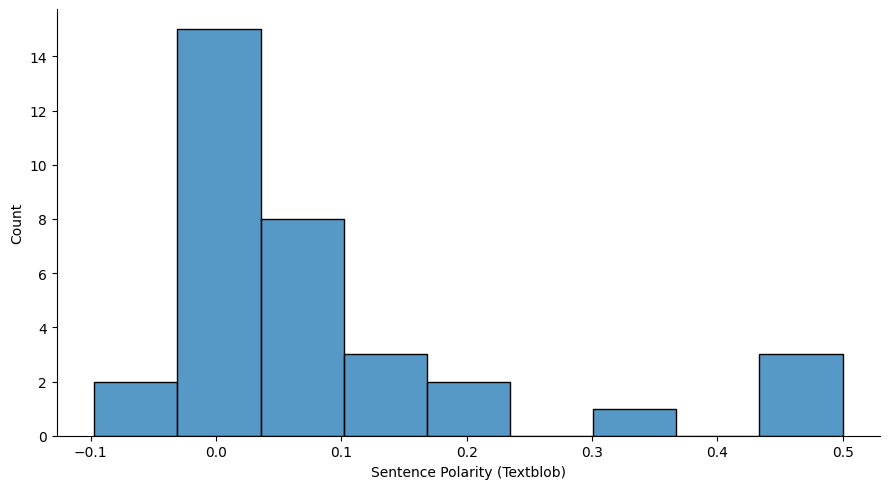

In [41]:


sns.displot(df_textblob["Polarity"],  height=5, aspect = 1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Textblob)')

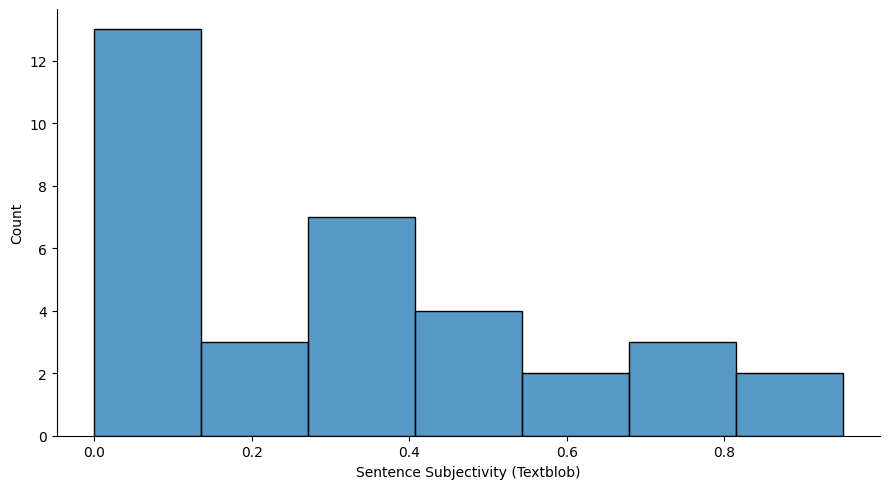

In [42]:
#now let's check for the subjectivity

sns.displot(df_textblob["Subjectivity"], height = 5, aspect = 1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

## Sentiment Analysis with Pattern
Pattern is also a very useful NLP and text processing library in Python. Pattern has functions to perform sentiment analysis of a text. The good part of pattern is that it is open source. Pattern has the function which can understand the opinions and sentiment of a text, let us implement it in Python.


**Pattern:**

Pattern is a separate, lower-level NLP library for Python.
It provides more fine-grained control and additional features for NLP tasks compared to TextBlob.

Some of its capabilities include sentiment analysis, parsing, and access to various linguistic resources.

TextBlob relies on the Pattern library, specifically for tasks like sentiment analysis. When you use TextBlob's sentiment analysis feature, it internally uses Pattern's sentiment analysis function.

In [45]:
#first we will take the sentiment scores

pattern_sentiment = []
for s in sentences:
  res = sentiment(s)
  c = res[0]
  d = res[1]
  pattern_sentiment.append([s,c,d])



In [46]:
pattern_sentiment[1]

['How Commercial Companies Are Advancing Space ExplorationNASAClayton SandellBy\xa0Clayton SandellFacebook ShareTweetEmailSMSPosted:  8:00 p.m. EDT',
 0.0,
 0.0]

In [47]:
#convert into the dataframe

df_pattern = pd.DataFrame(pattern_sentiment, columns=['Sentence', 'Polarity', 'Subjectivity'])

In [48]:
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.039394,0.254924
1,How Commercial Companies Are Advancing Space E...,0.000000,0.000000
2,"Oct 29, 2021As astronauts blast off to the Int...",0.050000,0.750000
3,Newly released video shows the Starship lift...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


Text(0.5, 9.444444444444438, 'Sentence Polarity (Pattern)')

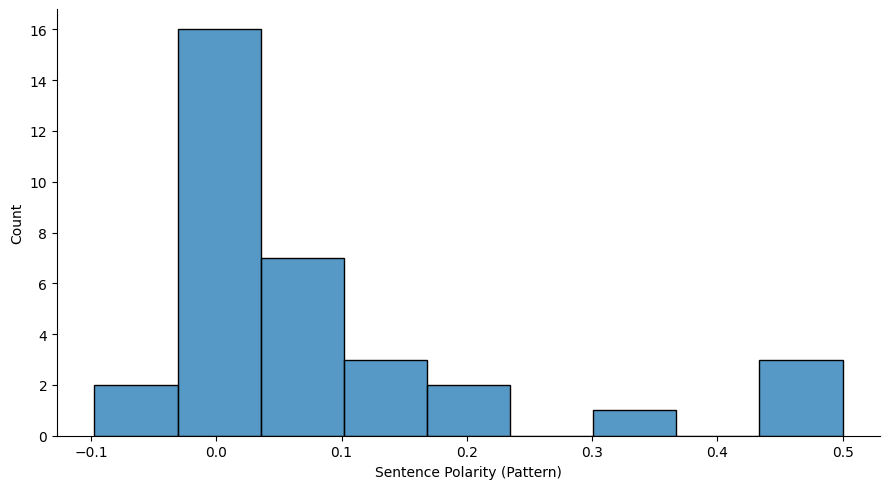

In [51]:
#draw a graph for polarity

sns.displot(df_pattern["Polarity"], height = 5, aspect = 1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 9.444444444444438, 'Sentence Subjectivity (pattern)')

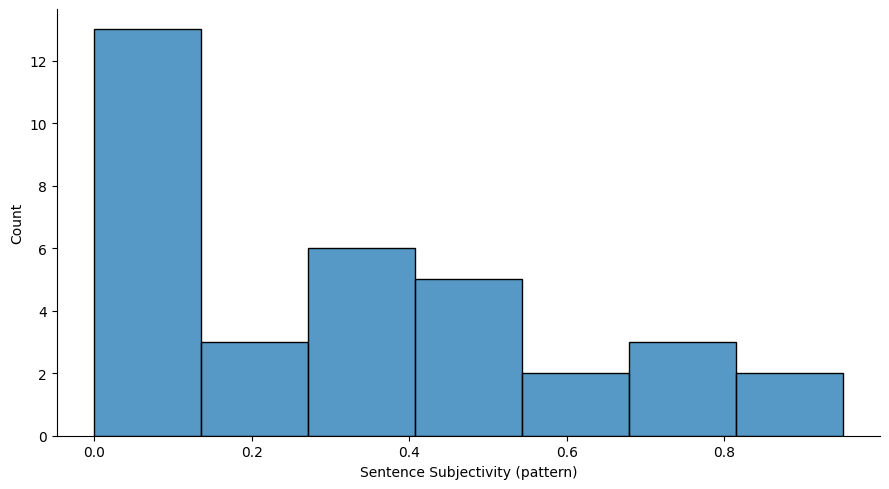

In [52]:
#graph for subjectivity
sns.displot(df_pattern["Subjectivity"], height = 5, aspect = 1.8)
plt.xlabel("Sentence Subjectivity (pattern)")

## Word Frequency and Word Cloud
A good way to understand the overall opinions and ideas in the text is by analyzing the word frequency and making a word cloud. They are great ways to visualize the sentiment expressed by an article or a blog.


We start by creating the NLTK tokenizer, the tokenizer will convert the text into individual tokens.

**Tokenization** is the process of breaking down a text or a sequence of characters into smaller units called "tokens." In natural language processing (NLP), tokens are typically words or subwords (subunits of words), and this process is a fundamental step in text preprocessing.

In [53]:
#creating the tokenizer

# tokenizer = nltk.tokenize.RegexpTokenizer('w+')
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')



In [54]:
#now perform the tokenization

tokens = tokenizer.tokenize(clean_text)

In [55]:
len(tokens)

805

In [56]:
tokens[:50]

['Commercial',
 'Companies',
 'Advance',
 'Space',
 'Exploration',
 'Scripps',
 'Newswatch',
 'livetoggle',
 'menuNewsU',
 'S',
 'NewsLifePoliticsBusinessScience',
 'HealthWorldTechEntertainmentSportsShowsScheduleShow',
 'ListDocumentariesIn',
 'Real',
 'LifeNext',
 'LevelBellingcatAll',
 'DocsInvestigationsAboutTeamViewer',
 'SpotlightHotlineSupportWhere',
 'to',
 'WatchSearchFollow',
 'Us',
 'SpaceHow',
 'Commercial',
 'Companies',
 'Are',
 'Advancing',
 'Space',
 'ExplorationThere',
 's',
 'competition',
 'among',
 'roughly',
 'a',
 'dozen',
 'private',
 'companies',
 'to',
 'launch',
 'new',
 'space',
 'stations',
 'How',
 'Commercial',
 'Companies',
 'Are',
 'Advancing',
 'Space',
 'ExplorationNASAClayton',
 'SandellBy',
 'Clayton']

In [57]:
#now convert them into lower case for uniformity
words = []
for word in tokens:
  words.append(word.lower())

In [58]:
words

['commercial',
 'companies',
 'advance',
 'space',
 'exploration',
 'scripps',
 'newswatch',
 'livetoggle',
 'menunewsu',
 's',
 'newslifepoliticsbusinessscience',
 'healthworldtechentertainmentsportsshowsscheduleshow',
 'listdocumentariesin',
 'real',
 'lifenext',
 'levelbellingcatall',
 'docsinvestigationsaboutteamviewer',
 'spotlighthotlinesupportwhere',
 'to',
 'watchsearchfollow',
 'us',
 'spacehow',
 'commercial',
 'companies',
 'are',
 'advancing',
 'space',
 'explorationthere',
 's',
 'competition',
 'among',
 'roughly',
 'a',
 'dozen',
 'private',
 'companies',
 'to',
 'launch',
 'new',
 'space',
 'stations',
 'how',
 'commercial',
 'companies',
 'are',
 'advancing',
 'space',
 'explorationnasaclayton',
 'sandellby',
 'clayton',
 'sandellfacebook',
 'sharetweetemailsmsposted',
 '8',
 '00',
 'p',
 'm',
 'edt',
 'oct',
 '29',
 '2021as',
 'astronauts',
 'blast',
 'off',
 'to',
 'the',
 'international',
 'space',
 'station',
 'this',
 'weekend',
 'on',
 'a',
 'spacex',
 'rocket',


In [59]:
#now removing the stopwords
#Stop words are a set of commonly used words in any language.
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words.
#In NLP and text mining applications, stop words are used to eliminate unimportant words,
#allowing applications to focus on the important words instead.
#English stop words from nltk
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
print(stopwords)
len(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [62]:
without_stopwords = []
for word in words:
  if word not in stopwords:
    without_stopwords.append(word)

In [63]:
len(without_stopwords)

478

In [64]:
print(without_stopwords[:15])

['commercial', 'companies', 'advance', 'space', 'exploration', 'scripps', 'newswatch', 'livetoggle', 'menunewsu', 'newslifepoliticsbusinessscience', 'healthworldtechentertainmentsportsshowsscheduleshow', 'listdocumentariesin', 'real', 'lifenext', 'levelbellingcatall']


In [65]:
#the frequency distribution of the words
freq_dist = nltk.FreqDist(without_stopwords)

In [66]:
(freq_dist)

FreqDist({'space': 14, 'nasa': 9, 'one': 6, 'like': 6, 'companies': 5, 'scripps': 5, 'private': 5, 'says': 5, 'commercial': 4, 'new': 4, ...})

In [74]:
# Sort the dictionary by frequency in descending order and take the top 20 items
sorted_freq_dist = dict(sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)[:20])

# Create a DataFrame from the sorted frequency distribution
df = pd.DataFrame({'Word': list(sorted_freq_dist.keys()), 'Frequency': list(sorted_freq_dist.values())})

# Create the bar chart using plotly
fig = px.bar(df, x='Word', y='Frequency', title='Top 20 Words by Frequency')
fig.show()

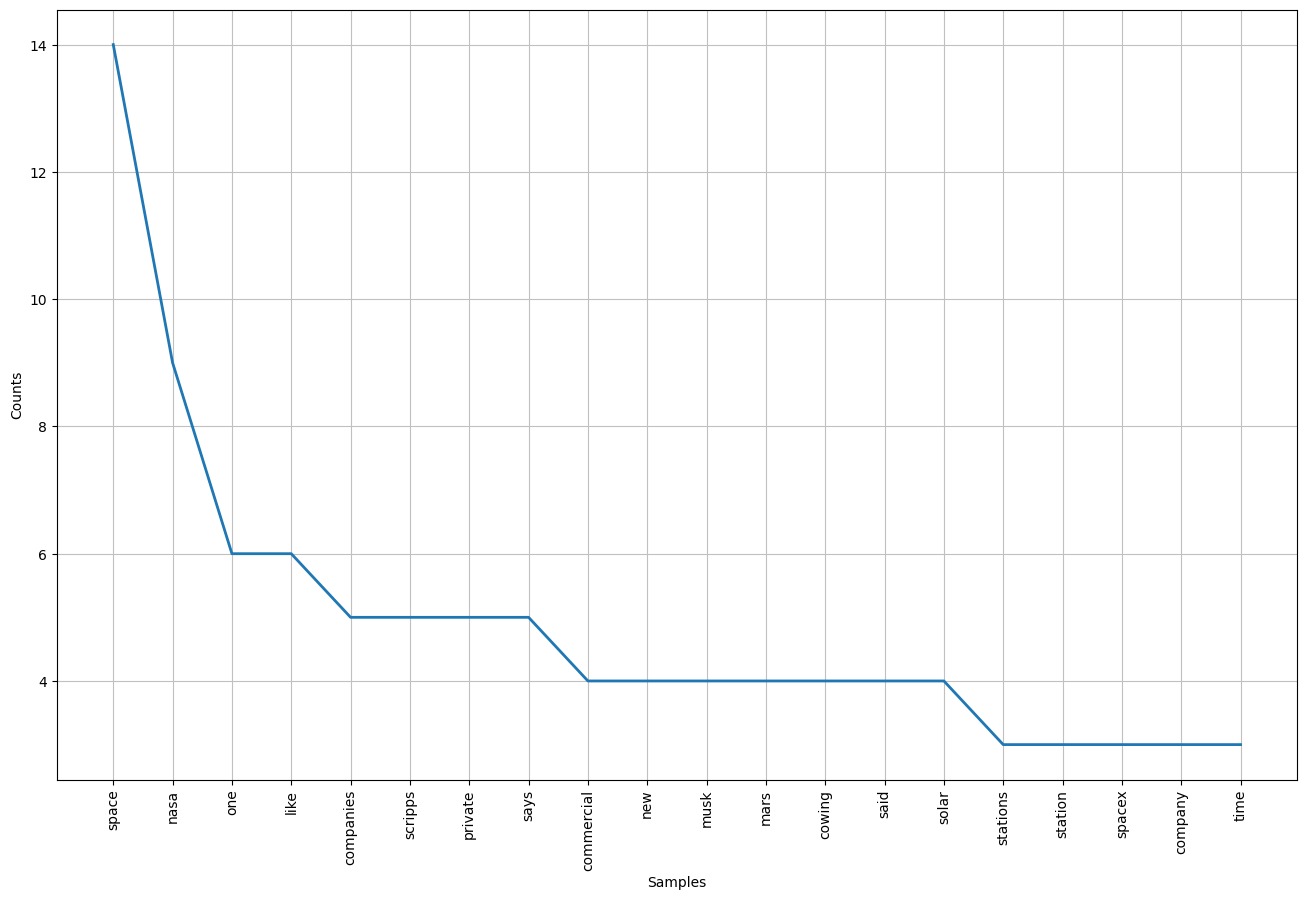

<Axes: xlabel='Samples', ylabel='Counts'>

In [67]:
#plot the frequency distribution plot

plt.subplots(figsize = (16,10))
freq_dist.plot(20)

In [75]:
#converting into string
res = ' '.join([i for i in without_stopwords if not i.isdigit()])

In [76]:
res

'commercial companies advance space exploration scripps newswatch livetoggle menunewsu newslifepoliticsbusinessscience healthworldtechentertainmentsportsshowsscheduleshow listdocumentariesin real lifenext levelbellingcatall docsinvestigationsaboutteamviewer spotlighthotlinesupportwhere watchsearchfollow us spacehow commercial companies advancing space explorationthere competition among roughly dozen private companies launch new space stations commercial companies advancing space explorationnasaclayton sandellby clayton sandellfacebook sharetweetemailsmsposted p edt oct 2021as astronauts blast international space station weekend spacex rocket company also showing massive ship says one day take travelers far far away newly released video shows starship lifting aerial ballet flips turns landing spacex hopes ship reach orbit first time next month maybe one day make founder elon musk mission mars dreams reality says want die mars impact editor spaceref com keith cowing said known elon forev

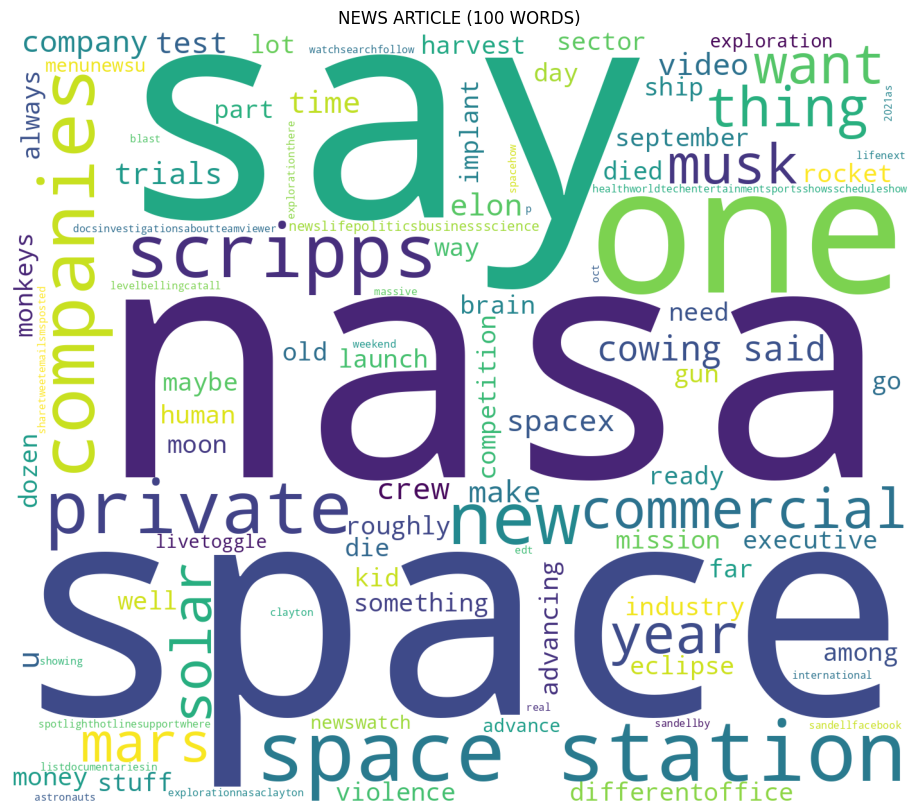

In [80]:
#now plot a word cloud with these text words

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
    background_color='white',
    max_words = 100,
    width = 1400,
    height = 1200).generate(res)

plt.imshow(wordcloud)
plt.title("NEWS ARTICLE (100 WORDS)")
plt.axis('off')
plt.show()

## Conclusion
So, using Web Scraping, we are able to gather information from a website and use the text data for sentiment analysis. The whole process is simple and easy. Web scraping and NLP have many applications. The vast amount of text data at our disposal is so large, that the potential is immense. With proper methods, these data can be used to make data-driven decisions.






